In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
pi=np.pi
sqrt=np.sqrt

#### Valors de les diferents masses (g), longitud fil conductor (m), muo (SI), distància r (m)

In [37]:
m1=5*1e-6
m2=10*1e-6
m3=15*1e-6
m4=20*1e-6
m5=25*1e-6
#
L=0.4
uL=0
#
muo=4*pi*1e-7
#
r=8.1/1000
ur=0
#Valor de g
g=9.8
#Incertesa experimental intensitat
uiexp=0
#Llista buida pels valors I^2 i les corresponents incerteses. Igual per la forca
I=[]
uI=[]
F=[]

# Força vs Corrent
### Mesures m1

In [38]:
#El valor de la intensitat serà més o menys
i1=sqrt(2*pi*r*m1*g/muo/L)
i1

2.2273863607376243

In [39]:
#Conjunt d'intensitats mesurades
i1exp=[70,71]
I1=np.mean(i1exp)

In [40]:
#Incertesa intensitat
uI1=sqrt(uiexp**2+(np.std(i1exp,ddof=1)/sqrt(len(i1exp)))**2)


In [41]:
#Afegim valors a la llista
I.append(I1)
uI.append(uI1)
F.append(m1*g)

### Mesures m2

In [42]:
#El valor de la intensitat serà més o menys
i2=sqrt(2*pi*r*m2*g/muo/L)
i2

3.1499999999999995

In [43]:
#Conjunt d'intensitats mesurades
i2exp=[99,100]
I2=np.mean(i2exp)

In [44]:
#Incertesa intensitat
uI2=sqrt(uiexp**2+(np.std(i2exp,ddof=1)/sqrt(len(i2exp)))**2)

In [45]:
#Afegim valors a la llista
I.append(I2)
uI.append(uI2)
F.append(m2*g)

### Mesures m3

In [46]:
#El valor de la intensitat serà més o menys
i3=sqrt(2*pi*r*m3*g/muo/L)
i3

3.857946344883505

In [47]:
#Conjunt d'intensitats mesurades
i3exp=[120,121]
I3=np.mean(i3exp)

In [48]:
#Incertesa intensitat
uI3=sqrt(uiexp**2+(np.std(i3exp,ddof=1)/sqrt(len(i3exp)))**2)

In [49]:
#Afegim valors a la llista
I.append(I3)
uI.append(uI3)
F.append(m3*g)

### Mesures m4

In [50]:
#El valor de la intensitat serà més o menys
i4=sqrt(2*pi*r*m4*g/muo/L)
i4

4.4547727214752486

In [51]:
#Conjunt d'intensitats mesurades
i4exp=[140,141]
I4=np.mean(i4exp)

In [52]:
#Incertesa intensitat
uI4=sqrt(uiexp**2+(np.std(i4exp,ddof=1)/sqrt(len(i4exp)))**2)

In [53]:
#Afegim valors a la llista
I.append(I4)
uI.append(uI4)
F.append(m4*g)

### Mesures m5

In [54]:
#El valor de la intensitat serà més o menys
i5=sqrt(2*pi*r*m5*g/muo/L)
i5

4.9805873147651969

In [55]:
# Conjunt d'intensitats mesurades
i5exp=[157,158]
I5=np.mean(i5exp)

In [56]:
#Incertesa intensitat
uI5=sqrt(uiexp**2+(np.std(i5exp,ddof=1)/sqrt(len(i5exp)))**2)

In [57]:
#Afegim valors a la llista
I.append(I5)
uI.append(uI5)
F.append(m5*g)

### Regressió lineal

In [58]:
#Guardem els valors de I^2
I_2=[]
for k in I:
    I_2.append(k**2)
uI_2=[]
for j in range(0,len(uI)):
    uI_2.append(2*I[j]*uI[j])
len(F)

5

In [59]:
#Eix x,I^2 Eix y, F, o bé al revés
linregress(I_2,F)

LinregressResult(slope=9.8927044712612852e-09, intercept=7.1212726644728839e-07, rvalue=0.99980363764039015, pvalue=3.3029988953285538e-06, stderr=1.1320418792721505e-10)

In [60]:
#y=a1x+b1
a1=linregress(I_2,F)[0]
ua1=0
b1=linregress(I_2,F)[1]
r12=linregress(I_2,F)[2]
#Falten incerteses paràmetres. Fer en casa...

In [61]:
#Permeabilitat magnètica
muoexp=2*pi*r*a1/L
umuo=muoexp*sqrt((ur/r)**2+(uL/L)**2+(ua1/a1)**2)
muoexp

1.2586933314874987e-09

In [62]:
#Comparació
abs(muo-muoexp)*100/muo

99.899836367228488

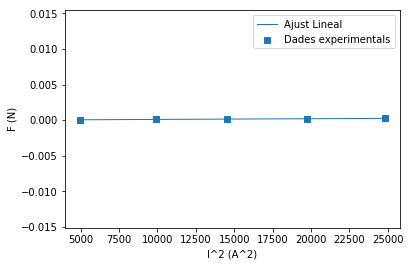

In [63]:
#Primer plot
i_2=np.array(I_2)
f=np.array(F)

plt.scatter(i_2,f,marker=',',label='Dades experimentals')
plt.plot(i_2,a1*i_2+b1,linewidth=1,label='Ajust Lineal')
plt.xlabel('I^2 (A^2)')
plt.ylabel('F (N)')
plt.legend()

plt.show()

In [64]:
#Generem fitxer pel gnuplot
#Matriu amb fila i I^2[i] F[i] u(I^2)[i]
M=[]
for i in range(0,4):
    M.append([I_2[i],F[i],uI_2[i]])
#Guardem en txt
np.savetxt('filscorrent',M)

# Força vs separació

In [70]:
#Tenim les mateixes masses
uangle=0
angles=[]

In [72]:
#angles=[angle5,angle10,angle15,angle20,angle25]

In [73]:
linregress(angles,F)#Falten incerteses!

In [74]:
#Regressió
a2=linregress(angles,F)[0]
b2=linregress(angles,F)[1]
r22=(linregress(angles,F)[2])**2

In [75]:
#Ara tenim
k=a2
uk=0 #Fer a casa

In [76]:
#Representant...
ang=np.array(angles)

plt.scatter(ang,f,marker=',',label='Dades experimentals')
plt.plot(ang,a2*ang+b2,linewidth=1,label='Ajust Lineal')
plt.xlabel('Angles º')
plt.ylabel('Força (N)')
plt.legend()

plt.show()

In [77]:
#Fixat corrent
ic=5
uic=0

In [86]:
distancies=[10/1000,4/1000]
#La incertesa és ur, ja fixada
invdist=[]
for k in distancies:
    invdist.append(1/k)

uinvr=[]
for j in distancies:
    uinvr.append(ur/j**2)

In [87]:
def force(K,theta):
    return K*theta
#s'hauria de retornar a2*theta+b2???

In [88]:
#expangles=[angles corresponents a les distàncies de dalt]
expangles=[]

In [89]:
#Les forces seran doncs:
FF=[]
uFF=[]
for j in expangles:
    FF.append(force(k*j))
for k in range(0,len(expangles)):
    uFF.append(FF[k]*sqrt((uk/k)**2+(uangle/angles[k])**2))

In [92]:
#3a regressió
linregress(invdist,FF)

In [ ]:
a3=linregress(invdist,FF)[0]
ua3=0
b3=linregress(invdist,FF)[1]
r32=(linregress(invdist,FF)[2])**2
#Novament falten incerteses

In [ ]:
#determinació muo
muoexp2=2*pi*a3/L/ic**2
umuoexp2=muoexp2*sqrt((ua3/a3)**2+(uL/L)**2+(uic*2/ic**2)**2)

In [ ]:
#plot
invd=np.array(invdist)
ff=np.array(FF)

plt.scatter(invd,ff,marker=',',label='Dades experimentals')
plt.plot(invd,a3*ff+b3,linewidth=1,label='Ajust Lineal')
plt.xlabel('1/r (1/m)')
plt.ylabel('Força (N)')
plt.legend()

plt.show()

In [ ]:
#generant txt pel gnuplot

#constant de torsió
m1=[]
for j in range(0,4):
    m1.append([angles[j],F[j],uangle])

#muo2
m2=[]
for k in range(0,len(invdist)):
    m2.append([invdist[k],FF[k],uinvr[k],uFF[k]])

np.savetxt('ktorsio',m1)
np.savetxt('f(1/r)',m2)

# Camp magnètic Terra

In [96]:
intensitat=6
longitud=L
#F=experimental
forceta=0

In [97]:
Bterra=forceta/longitud/intensitat#fer incerteses...
Bterra

0.0